# Dataset Analysis and Description

This notebook is used to analyze the dataset and describe its characteristics (Task 3 of the project).

> Analyze and describe the characteristics of the dataset (size, attribute types as discussed in class, 
> value ranges, sparsity, min/max values, outliers, missing values, correlations, ...), and describe this 
> in the report. Also, describe any hypotheses you might have concerning the distribution of the data, 
> number of clusters and their relationship, majority/minority classes

We are looking at the [`MiceProtein`](https://openml.org/search?type=data&sort=runs&status=active&qualities.NumberOfInstances=between_1000_10000&qualities.NumberOfFeatures=between_10_100&id=40966) dataset from openML:

> Author: Clara Higuera, Katheleen J. Gardiner, Krzysztof J. Cios
> Source: UCI - 2015

`Higuera C, Gardiner KJ, Cios KJ (2015) Self-Organizing Feature Maps Identify Proteins Critical to Learning in a Mouse Model of Down Syndrome. PLoS ONE 10(6): e0129126.`

The eight classes of mice are described based on features such as genotype, behavior and treatment. According to genotype, mice can be control or trisomic. According to behavior, some mice have been stimulated to learn (context-shock) and others have not (shock-context) and in order to assess the effect of the drug memantine in recovering the ability to learn in trisomic mice, some mice have been injected with the drug and others have not.

## Libraries and Setup

### Install Libraries

In [39]:
%pip install liac-arff numpy pandas scikit-learn matplotlib seaborn scipy --quiet

Note: you may need to restart the kernel to use updated packages.


### Import Libraries

In [44]:
import io
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.io import arff
from scipy.stats import zscore

from sklearn import preprocessing

### Data Loading

In [45]:
with open("data/phpchCuL5.arff", 'r') as f:
    data, meta = arff.loadarff(io.StringIO(f.read()))

df = pd.DataFrame(data)

In [46]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,b'309_1',0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,b'Control',b'Memantine',b'C/S',b'c-CS-m'
1,b'309_2',0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,b'Control',b'Memantine',b'C/S',b'c-CS-m'
2,b'309_3',0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,b'Control',b'Memantine',b'C/S',b'c-CS-m'
3,b'309_4',0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,b'Control',b'Memantine',b'C/S',b'c-CS-m'
4,b'309_5',0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,b'Control',b'Memantine',b'C/S',b'c-CS-m'


## Analysis

We start of by analyzing the dataset using mainly pandas and matplotlib, at the end of each section we will summarize our findings.

### Basic Information

In [47]:
df.head()

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,b'309_1',0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,b'Control',b'Memantine',b'C/S',b'c-CS-m'
1,b'309_2',0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,b'Control',b'Memantine',b'C/S',b'c-CS-m'
2,b'309_3',0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,b'Control',b'Memantine',b'C/S',b'c-CS-m'
3,b'309_4',0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,b'Control',b'Memantine',b'C/S',b'c-CS-m'
4,b'309_5',0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,b'Control',b'Memantine',b'C/S',b'c-CS-m'


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MouseID          1080 non-null   object 
 1   DYRK1A_N         1077 non-null   float64
 2   ITSN1_N          1077 non-null   float64
 3   BDNF_N           1077 non-null   float64
 4   NR1_N            1077 non-null   float64
 5   NR2A_N           1077 non-null   float64
 6   pAKT_N           1077 non-null   float64
 7   pBRAF_N          1077 non-null   float64
 8   pCAMKII_N        1077 non-null   float64
 9   pCREB_N          1077 non-null   float64
 10  pELK_N           1077 non-null   float64
 11  pERK_N           1077 non-null   float64
 12  pJNK_N           1077 non-null   float64
 13  PKCA_N           1077 non-null   float64
 14  pMEK_N           1077 non-null   float64
 15  pNR1_N           1077 non-null   float64
 16  pNR2A_N          1077 non-null   float64
 17  pNR2B_N       

In [49]:
print("shape: \t", df.shape)

shape: 	 (1080, 82)


In [50]:
print("types: \t", df.dtypes)

types: 	 MouseID       object
DYRK1A_N     float64
ITSN1_N      float64
BDNF_N       float64
NR1_N        float64
              ...   
CaNA_N       float64
Genotype      object
Treatment     object
Behavior      object
class         object
Length: 82, dtype: object


In [51]:
print("columns: \t", df.columns)

columns: 	 Index(['MouseID', 'DYRK1A_N', 'ITSN1_N', 'BDNF_N', 'NR1_N', 'NR2A_N', 'pAKT_N',
       'pBRAF_N', 'pCAMKII_N', 'pCREB_N', 'pELK_N', 'pERK_N', 'pJNK_N',
       'PKCA_N', 'pMEK_N', 'pNR1_N', 'pNR2A_N', 'pNR2B_N', 'pPKCAB_N',
       'pRSK_N', 'AKT_N', 'BRAF_N', 'CAMKII_N', 'CREB_N', 'ELK_N', 'ERK_N',
       'GSK3B_N', 'JNK_N', 'MEK_N', 'TRKA_N', 'RSK_N', 'APP_N', 'Bcatenin_N',
       'SOD1_N', 'MTOR_N', 'P38_N', 'pMTOR_N', 'DSCR1_N', 'AMPKA_N', 'NR2B_N',
       'pNUMB_N', 'RAPTOR_N', 'TIAM1_N', 'pP70S6_N', 'NUMB_N', 'P70S6_N',
       'pGSK3B_N', 'pPKCG_N', 'CDK5_N', 'S6_N', 'ADARB1_N', 'AcetylH3K9_N',
       'RRP1_N', 'BAX_N', 'ARC_N', 'ERBB4_N', 'nNOS_N', 'Tau_N', 'GFAP_N',
       'GluR3_N', 'GluR4_N', 'IL1B_N', 'P3525_N', 'pCASP9_N', 'PSD95_N',
       'SNCA_N', 'Ubiquitin_N', 'pGSK3B_Tyr216_N', 'SHH_N', 'BAD_N', 'BCL2_N',
       'pS6_N', 'pCFOS_N', 'SYP_N', 'H3AcK18_N', 'EGR1_N', 'H3MeK4_N',
       'CaNA_N', 'Genotype', 'Treatment', 'Behavior', 'class'],
      dtype='object')

In [52]:
print(df.describe())

          DYRK1A_N      ITSN1_N       BDNF_N        NR1_N       NR2A_N  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000   
mean      0.425810     0.617102     0.319088     2.297269     3.843934   
std       0.249362     0.251640     0.049383     0.347293     0.933100   
min       0.145327     0.245359     0.115181     1.330831     1.737540   
25%       0.288121     0.473361     0.287444     2.057411     3.155678   
50%       0.366378     0.565782     0.316564     2.296546     3.760855   
75%       0.487711     0.698032     0.348197     2.528481     4.440011   
max       2.516367     2.602662     0.497160     3.757641     8.482553   

            pAKT_N      pBRAF_N    pCAMKII_N      pCREB_N       pELK_N  ...  \
count  1077.000000  1077.000000  1077.000000  1077.000000  1077.000000  ...   
mean      0.233168     0.181846     3.537109     0.212574     1.428682  ...   
std       0.041634     0.027042     1.295169     0.032587     0.466904  ...   
min       0.06323

#### Summary of basic information

- Number of Instances (Rows): 1080
- Number of Attributes (Columns): 82

**Attribute Information:**

Attributes include Mouse ID, 77 protein expression levels (e.g., DYRK1A_N, ITSN1_N), Genotype, Treatment, Behavior, and Class.
Most attributes are of the float64 type, representing protein expression levels. Categorical data like Genotype, Treatment, Behavior, and Class are of the object type.

**82 Class:**
  * c-CS-s: control mice, stimulated to learn, injected with saline (9 mice) 
  * c-CS-m: control mice, stimulated to learn, injected with memantine (10 mice) 
  * c-SC-s: control mice, not stimulated to learn, injected with saline (9 mice) 
  * c-SC-m: control mice, not stimulated to learn, injected with memantine (10 mice) 
  * t-CS-s: trisomy mice, stimulated to learn, injected with saline (7 mice) 
  * t-CS-m: trisomy mice, stimulated to learn, injected with memantine (9 mice) 
  * t-SC-s: trisomy mice, not stimulated to learn, injected with saline (9 mice) 
  * t-SC-m: trisomy mice, not stimulated to learn, injected with memantine (9 mice) 




### Data Quality and Statistics

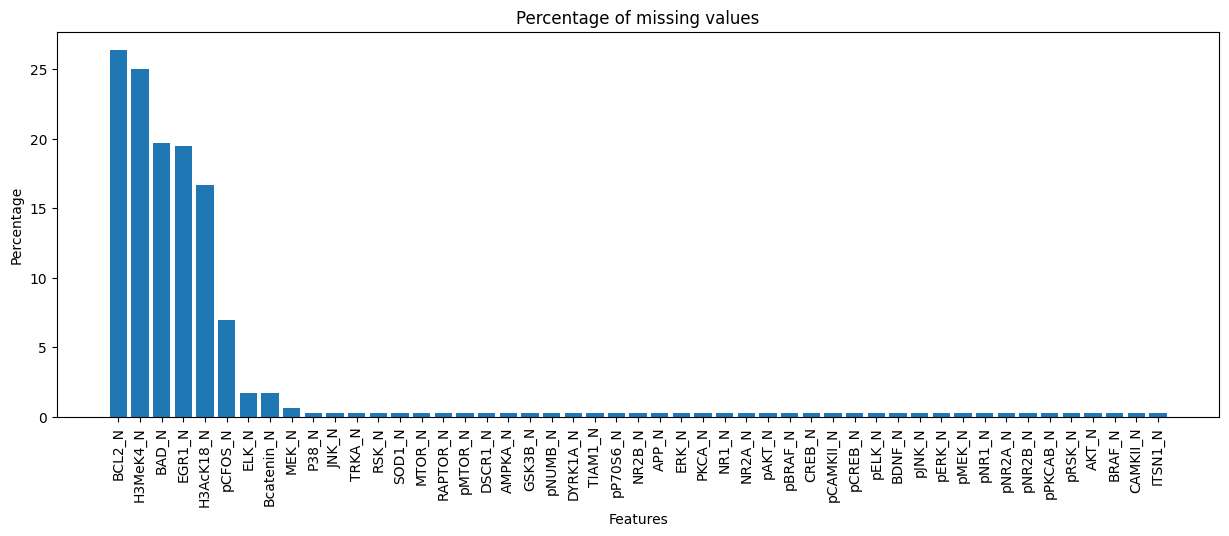

In [53]:
missing_values = df.isnull().sum().sort_values(ascending=False)
percentage_missing_values = (missing_values / df.shape[0]) * 100

# remove items from percentage_missing_values that have 0% missing values
percentage_missing_values = percentage_missing_values[percentage_missing_values != 0]

# plot missing values
plt.figure(figsize=(15, 5))
plt.tight_layout()

plt.title("Percentage of missing values")
plt.xlabel("Features")
plt.ylabel("Percentage")
plt.xticks(rotation=90)
plt.bar(percentage_missing_values.index, percentage_missing_values.values)

plt.show()

In [54]:
# Checking for outliers using Z-score (threshold: 3)
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = np.abs(zscore(numeric_cols))
outliers = (z_scores > 3).any(axis=1).sum()

print("Number of outliers: ", outliers)

Number of outliers:  115


<Axes: >

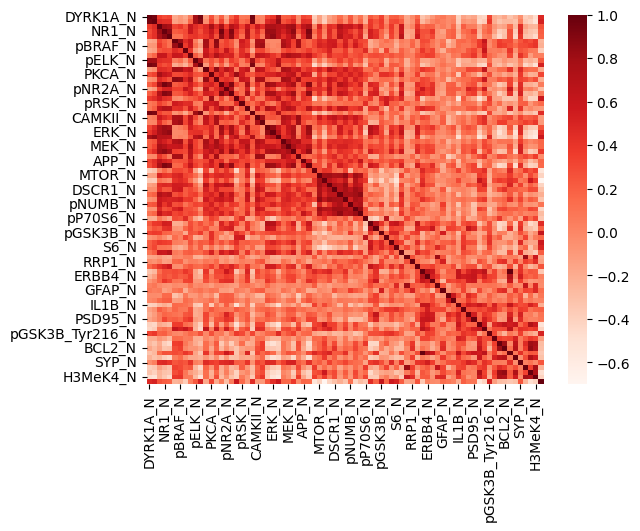

In [59]:
correlation_matrix = numeric_cols.corr()

sns.heatmap(correlation_matrix, cmap=plt.cm.Reds)

#### Summary of Data Quality and Statistics

- Missing Values: The dataset contains missing values in several columns, with the number varying across different proteins. For example, DYRK1A_N has only 3 missing values, whereas ITSN1_N has 14 missing BCL2_N has over 25% missing values.
  
- Descriptive Statistics: The numeric attributes have a range of different means, standard deviations, and other statistical measures. Some attributes have a maximum value significantly higher than the 75th percentile, indicating potential outliers. For example, DYRK1A_N has a mean of 0.426 and a standard deviation of 0.249.
- Outliers: Approximately 115 instances contain values that are more than 3 standard deviations away from the mean in at least one numeric attribute, suggesting the presence of outliers.
- Correlation Matrix: There are varying levels of correlation between different attributes. Some attributes show high positive correlation, while others are less correlated. For instance, DYRK1A_N and ITSN1_N show a high correlation (0.96).

### Hypotheses and Observations

#### Distributions

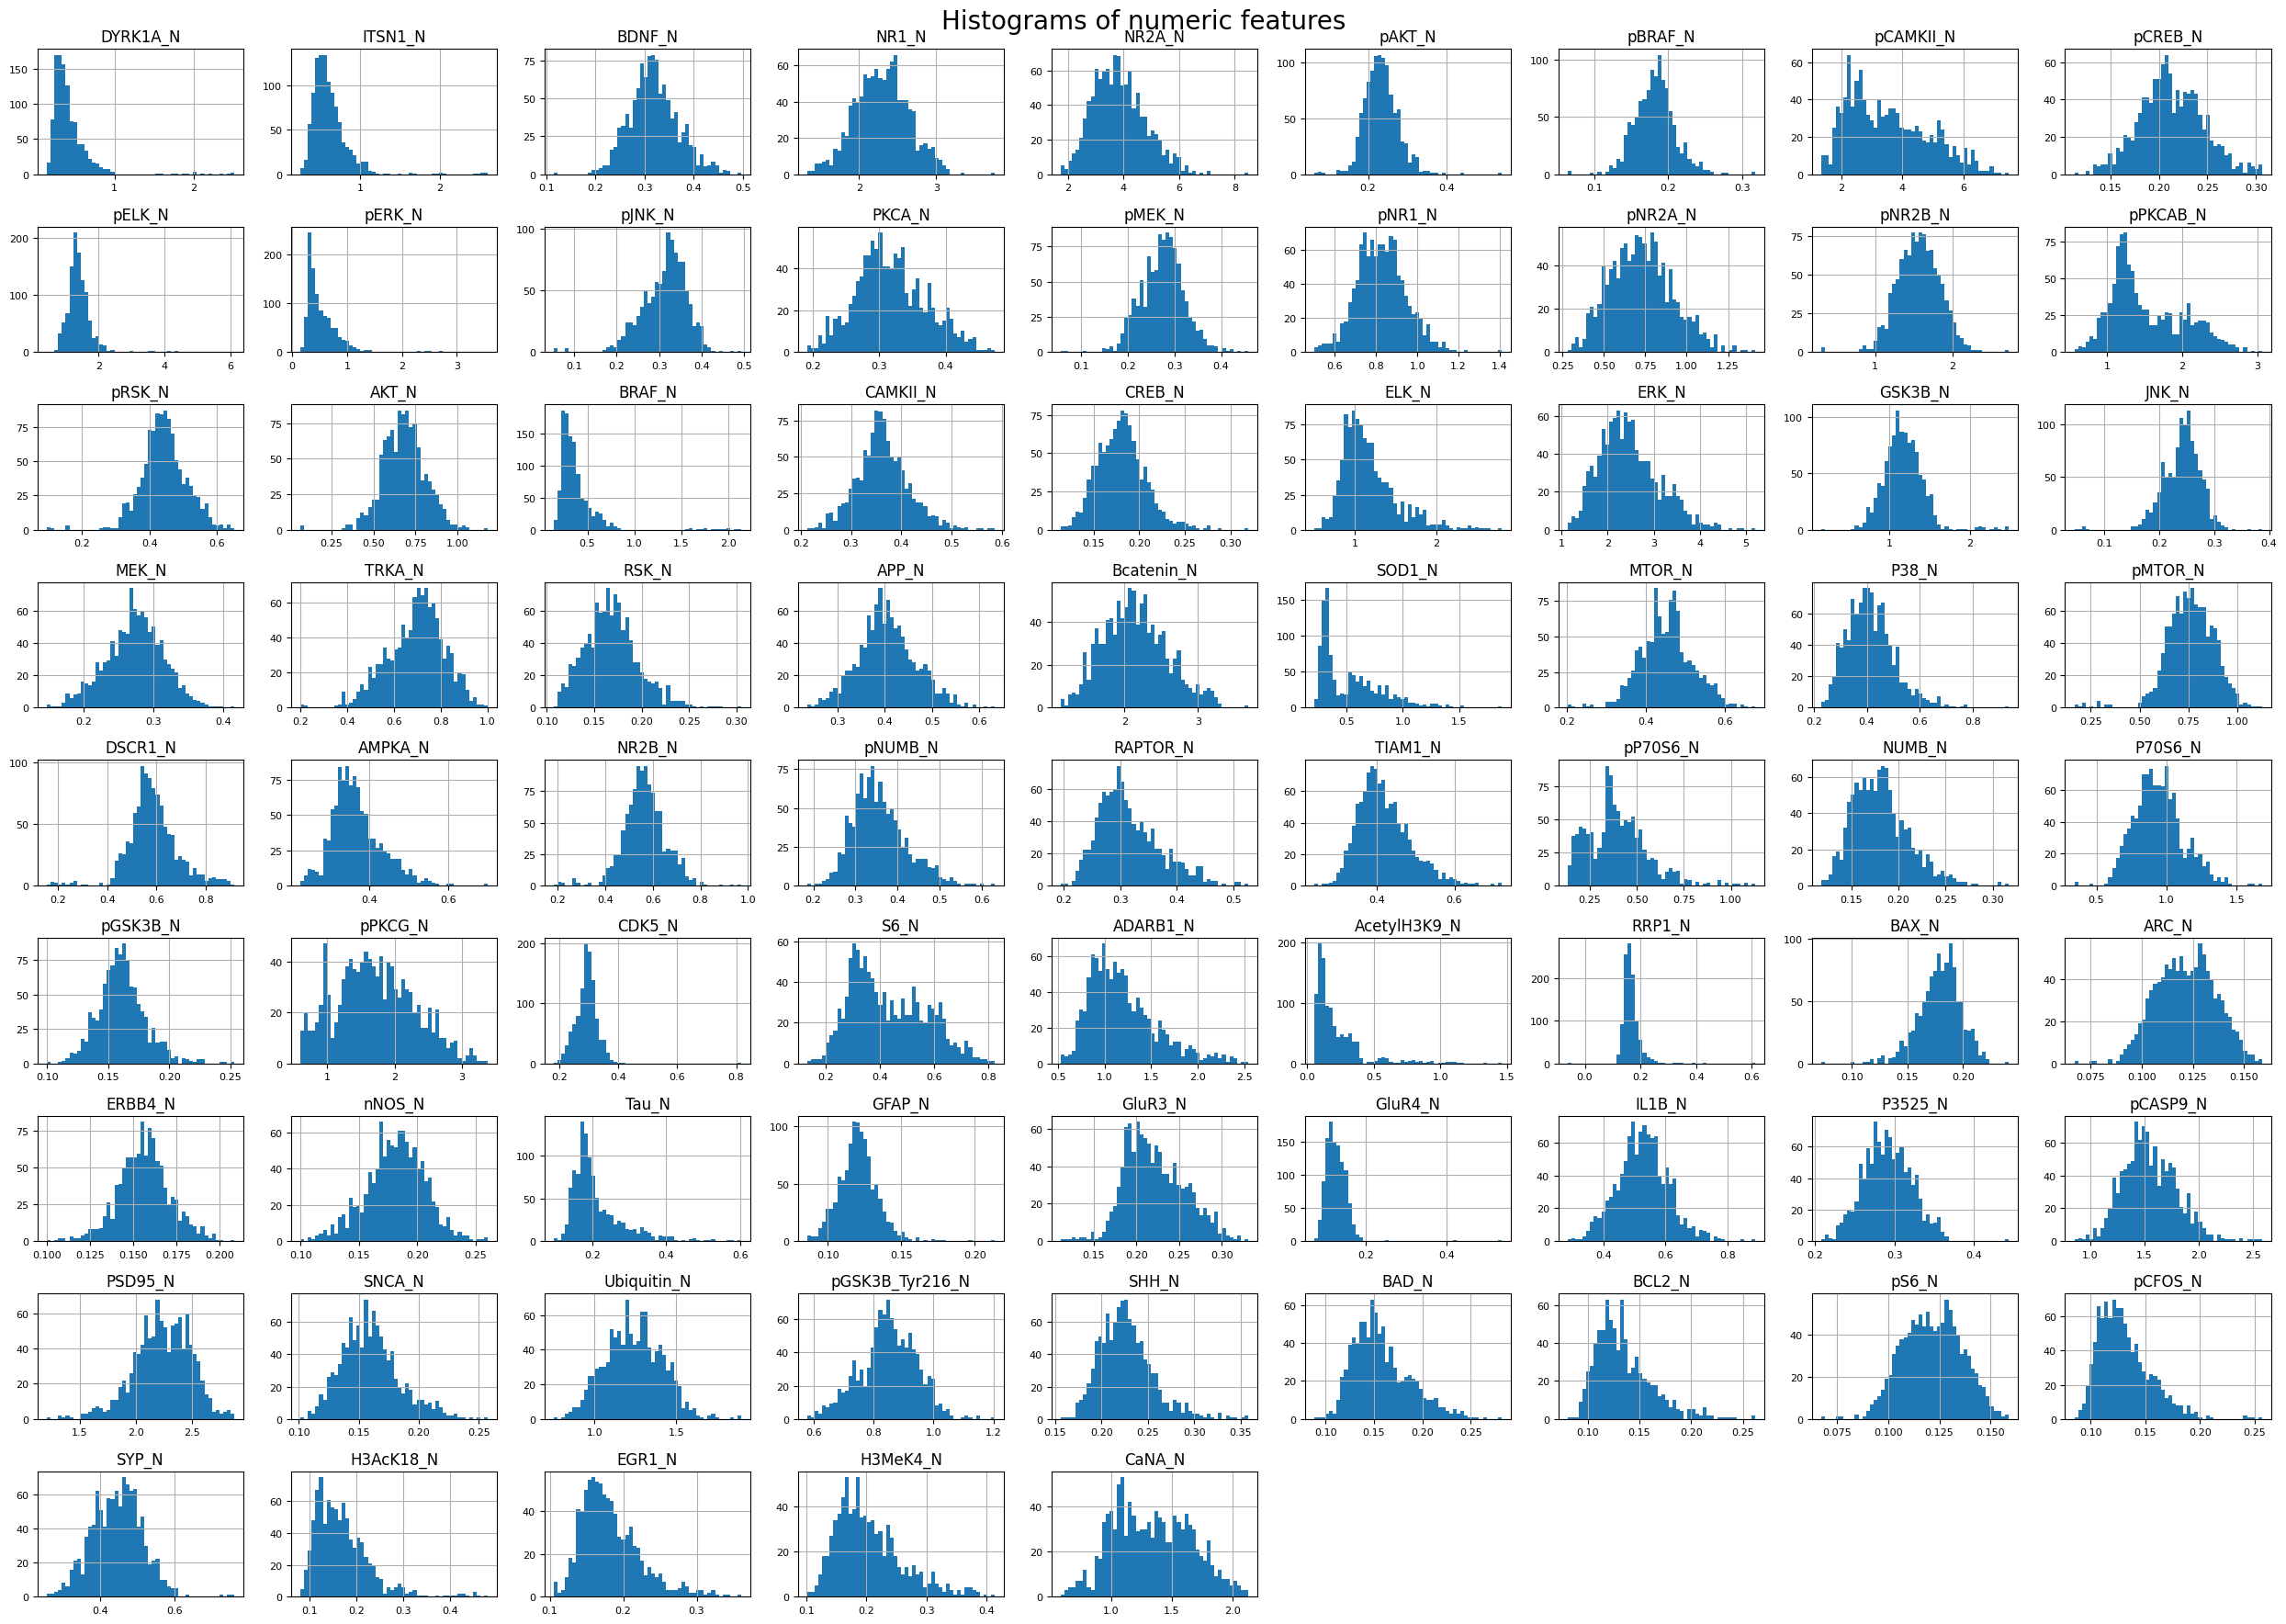

In [69]:
df.hist(figsize=(25, 18), bins=50, xlabelsize=8, ylabelsize=8)
plt.suptitle("Histograms of numeric features", fontsize=20)
plt.tight_layout()

#### In-depth Analysis / Observations

- **Central Tendency:** 
    Most proteins show a clear peak, indicating the most common expression level. This peak represents the mode of the distribution for each protein.

- **Skewness:**
    - Right-skewed: Some protein levels are mostly concentrated on the left, with a tail stretching towards the right. This indicates that there are some higher-than-average values that are not as common.
    - Left-skewed: Few histograms indicate a concentration of data on the right with a tail to the left, suggesting outliers or less common lower values.

- **Spread and Dispersion:** 
    The width of the histograms varies, indicating different levels of variability among the protein expression levels. Some histograms are quite narrow (e.g., pNR1_N), suggesting low variability, while others are wider (e.g., GluR4_N), indicating higher variability.

- **Outliers:**
    Some proteins exhibit potential outliers, which can be inferred from the long tails in the histograms. For instance, proteins like pAKT_N and pGSK3B_Tyr216_N have long right tails, indicating the presence of high-value outliers.

- **Normality:** 
    Few histograms resemble a normal distribution, but many deviate from it. It is common in biological data for distributions to deviate from normality due to various biological factors.

- **Multiplicity of Modes:** 
    Several histograms appear to be bimodal or multimodal (e.g., Tau_N), suggesting the presence of multiple sub-populations within the dataset.

- **Sample Size:** 
    The consistent height across histograms indicates a relatively uniform sample size across different proteins, which is beneficial for comparative analysis.

- **Bimodal Distributions:**
    Some histograms show two distinct peaks (e.g., APP_N), which may suggest that the dataset contains two subgroups, possibly related to the two genotypes (control and trisomy) or other categorical distinctions within the data.

#### Class Distribution

<Axes: title={'center': 'Class distribution'}, xlabel='class'>

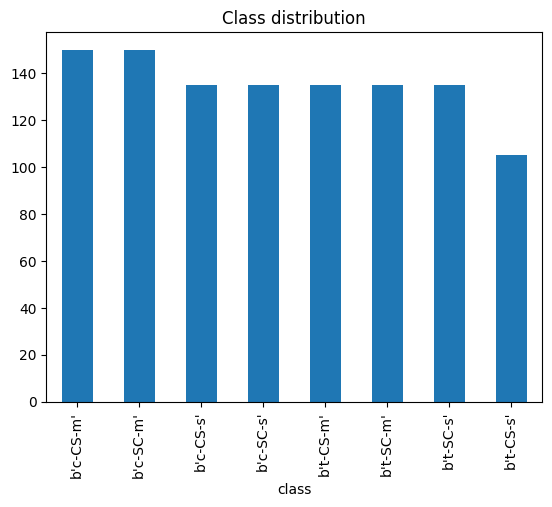

In [65]:
df["class"].value_counts().plot(kind="bar", title="Class distribution")

#### Summary of Hypotheses and Observations

- There could be distinct clusters representing different genotypes or treatment groups.
  
- Given the distinct classes based on genotype, behavior, and treatment, the data could potentially form clusters along these lines. 
- The 'c-CS-m' class has the highest frequency, the others are however not too far behind.
- Some proteins may show different expression levels across the classes, particularly between control and trisomy mice.